# CLASSIFICATION USING ALL CLASSIFICATION ALGORITHMS

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Importing Data
Read the train dataset in to a pandas dataframe

In [2]:
df=pd.read_csv("titanic_train.csv")
dftst=pd.read_csv("titanic_test.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
dftst.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


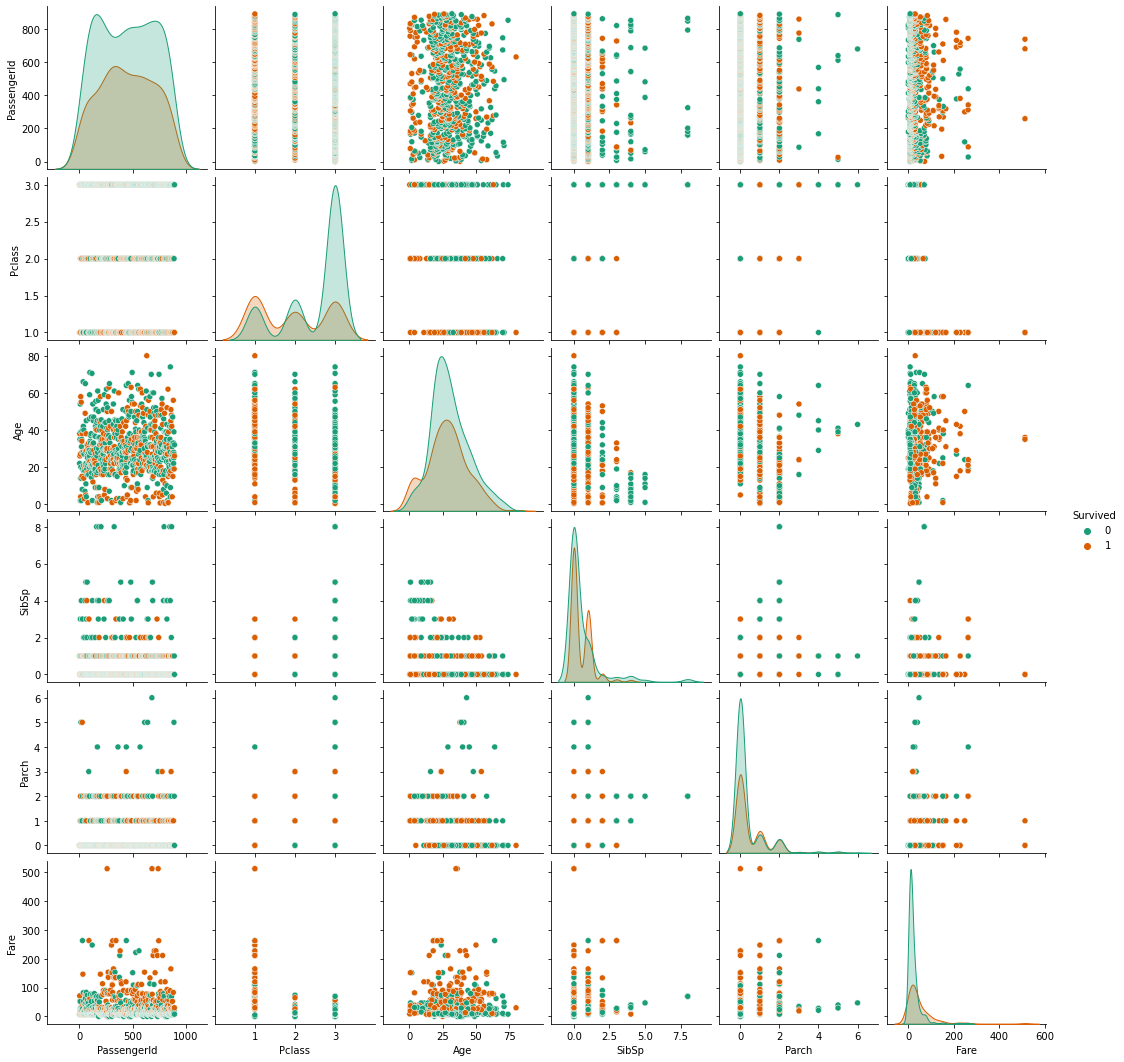

In [4]:
sns.pairplot(df,hue="Survived",palette='Dark2')

# Exploratory Data Analysis

## Missing Data


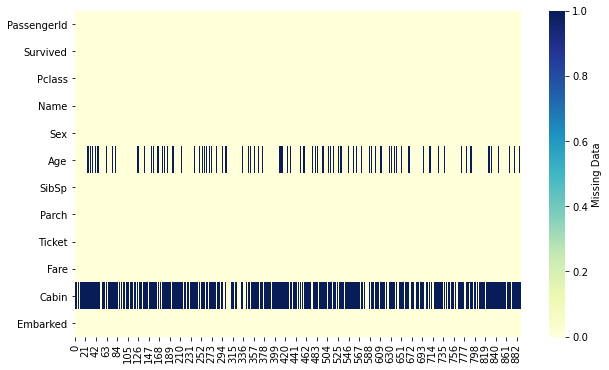

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

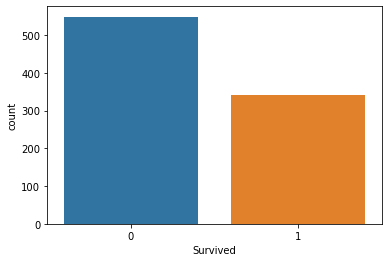

In [6]:
sns.countplot(x ='Survived', data = df)

Create a histogram for the target variable "Survived" for males and females. 

<AxesSubplot:xlabel='Survived', ylabel='count'>

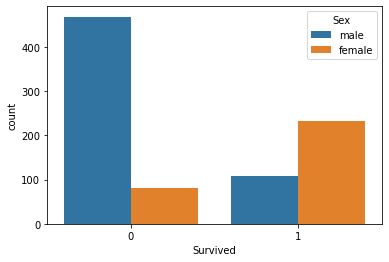

In [7]:
sns.countplot(x ='Survived', hue = "Sex", data = df)

Create a histogram for the  "Pclass" feature.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

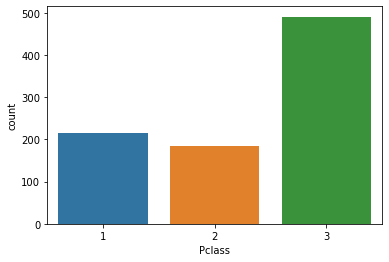

In [8]:
sns.countplot(x ='Pclass', data = df)

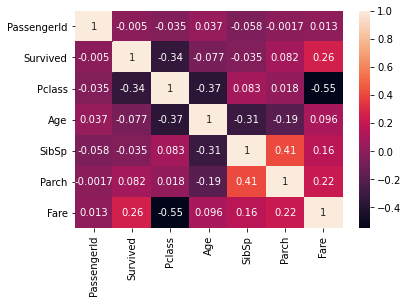

In [9]:
#Heatmap of all features:

sns.heatmap(df.corr(), annot = True)
plt.show()

## Data Pre-Processing
Filling in the missing data points with the average age for the age column. Dropped the Cabin column and all the rows that have feature Embarked that is NaN. 

In [10]:
#Finding the count of null values wrt to attributes/features/columns.

undefined_values=df.isnull().sum()
print(undefined_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [11]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
#Filling in the null values using the mean value of the particular feature.

df.fillna(df.mean(), inplace=True)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [13]:
#Finding the count of null values wrt to attributes/features/columns after filling in the mean values in place of null.

undefined_values=df.isnull().sum()
print(undefined_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
#Dropping the cabin column from the existing dataframe

df1=df.drop(['Cabin'], axis = 1)
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [15]:
#Dropping the rows from embarked features that contains NaN values.

df2=df1.dropna()
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [16]:
#Checking if all the undefined values have been cleaned & our new dataframe has no null values.

undefined_values=df2.isnull().sum()
print(undefined_values)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Converting Categorical Features 

Using pandas.get_dummies() function to convert categorical data

In [17]:
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [18]:
#Converting Age from float to integer datatype

df2.Age = df2.Age.astype('int64')

/Users/namitrasalkar/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
df2.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [20]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [21]:
#Converting the categorical features using get_dummies() function.

df3=pd.get_dummies(df2,columns=['Sex','Embarked'])
df3

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26,0,0,111369,30.0000,0,1,1,0,0


In [22]:
df3.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [23]:
#Preparing the final dataframe to train the model using Logistic Regression algorithm

lrdf=df3.drop(['Name','Ticket'], axis = 1)
lrdf

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7.2500,0,1,0,0,1
1,2,1,1,38,1,0,71.2833,1,0,1,0,0
2,3,1,3,26,0,0,7.9250,1,0,0,0,1
3,4,1,1,35,1,0,53.1000,1,0,0,0,1
4,5,0,3,35,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13.0000,0,1,0,0,1
887,888,1,1,19,0,0,30.0000,1,0,0,0,1
888,889,0,3,29,1,2,23.4500,1,0,0,0,1
889,890,1,1,26,0,0,30.0000,0,1,1,0,0


In [24]:
lrdf.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [25]:
lrdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## Training and Predicting



In [26]:
#Splitting of the train.csv file into 80:20 ratio for training and testing respectively.

from sklearn.model_selection import train_test_split
X = lrdf[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = lrdf['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Logistic Regression:

In [27]:
#Implementation of Logistic Regression

logistic_regression = LogisticRegression(max_iter=10000)
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1])

In [28]:
#Concatenating the Predicted values and actual values in one dataframe lr_op.

lr_op = pd.DataFrame({'Actual value': y_test, 'Predicted value using Logistic Regression': y_pred})
lr_op.head(20)

,Actual value,Predicted value using Logistic Regression
543,1,0
327,1,1
73,0,0
358,1,1
660,1,0
795,0,0
703,0,0
582,0,0
349,0,0
508,0,0


In [29]:
#Compute the Mean Square error for the Logistic Regression trained model:

meanSqErr = metrics.mean_squared_error(y_test, y_pred)
print('Mean Square Error for Logistic Regression:', meanSqErr)

Mean Square Error for Logistic Regression: 0.24719101123595505


In [30]:
#Compute the accuracy of Logistic Regression Model:

from sklearn.metrics import accuracy_score
print("Accuracy Score of Logistic Regression: ",accuracy_score(y_test,y_pred))

Accuracy Score of Logistic Regression:  0.7528089887640449


# Testing the test.csv file dataset on the trained Logistic Regression Model

In [31]:
test_df=pd.read_csv('titanic_test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [32]:
#Checking for count of null values wrt columns

undefined_values_test=test_df.isnull().sum()
print(undefined_values_test)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [33]:
#Drop the cabin column

test_df1=test_df.drop(['Cabin'], axis = 1)
test_df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [34]:
#Filling up the null values with the mean

test_df1.fillna(test_df1.mean(), inplace=True)
test_df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [35]:
#Checking for count of null values wrt columns after filling in the null values with the mean.

undefined_values_test1=test_df1.isnull().sum()
print(undefined_values_test1)

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [36]:
test_df1.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [37]:
#Converting Age from float to integer datatype

test_df1.Age = test_df1.Age.astype('int64')

In [38]:
test_df1.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [39]:
test_df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,S


In [40]:
#Converting the categorical features using get_dummies() function.

test_df2=pd.get_dummies(test_df1,columns=['Sex','Embarked'])
test_df2

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62,0,0,240276,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27,0,0,315154,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,1,1,3101298,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",30,0,0,A.5. 3236,8.0500,0,1,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39,0,0,PC 17758,108.9000,1,0,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38,0,0,SOTON/O.Q. 3101262,7.2500,0,1,0,0,1
416,1308,3,"Ware, Mr. Frederick",30,0,0,359309,8.0500,0,1,0,0,1


In [41]:
#Preparing the final dataframe to train the model using Logistic Regression algorithm

lr_test_df=test_df2.drop(['Name','Ticket'], axis = 1)
lr_test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34,0,0,7.8292,0,1,0,1,0
1,893,3,47,1,0,7.0000,1,0,0,0,1
2,894,2,62,0,0,9.6875,0,1,0,1,0
3,895,3,27,0,0,8.6625,0,1,0,0,1
4,896,3,22,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30,0,0,8.0500,0,1,0,0,1
414,1306,1,39,0,0,108.9000,1,0,1,0,0
415,1307,3,38,0,0,7.2500,0,1,0,0,1
416,1308,3,30,0,0,8.0500,0,1,0,0,1


In [42]:
lr_test_df.dtypes

PassengerId      int64
Pclass           int64
Age              int64
SibSp            int64
Parch            int64
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [43]:
lr_test_df.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [44]:
X_test_new=lr_test_df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

In [45]:
# Testing the test_titanic dataset on the trained Logistic Regression Model.

y_pred_new = logistic_regression.predict(X_test_new)
y_pred_new

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
#Predicted outputs using test_titanic.csv dataset

lr_new_op = pd.DataFrame({'Predicted value': y_pred_new})
lr_new_op

,Predicted value
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       109
           1       0.70      0.64      0.67        69

    accuracy                           0.75       178
   macro avg       0.74      0.73      0.74       178
weighted avg       0.75      0.75      0.75       178



# Support Vector Machines

## Train a Support Vector Classifier

In [49]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [50]:
predictions = svc_model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [51]:
#Predicted outputs using test_titanic.csv dataset

svm_op = pd.DataFrame({'Actual Value':y_test,'Predicted value using SVM': predictions})
svm_op.head(30)

,Actual Value,Predicted value using SVM
543,1,0
327,1,0
73,0,0
358,1,0
660,1,1
795,0,0
703,0,0
582,0,0
349,0,0
508,0,0


In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
cm1=confusion_matrix(y_test,predictions)
print(cm1)

[[106   3]
 [ 62   7]]


<AxesSubplot:>

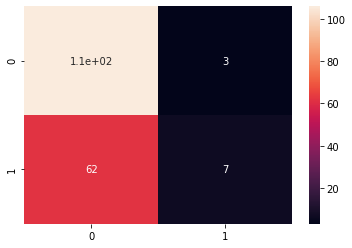

In [54]:
#Plot the heatmap:

sns.heatmap(cm1, annot=True)

In [55]:
#Classification report:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.63      0.97      0.77       109
           1       0.70      0.10      0.18        69

    accuracy                           0.63       178
   macro avg       0.67      0.54      0.47       178
weighted avg       0.66      0.63      0.54       178



In [56]:
#Mean Square error for the model:

meanSqErr_SVM = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error:', meanSqErr_SVM)

Mean Square Error: 0.3651685393258427


In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of SVM: ",accuracy_score(y_test,predictions))

Accuracy Score of SVM:  0.6348314606741573


## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [59]:
grid_predictions = grid.predict(X_test)

In [60]:
#Confusion Matrix:

cm2=confusion_matrix(y_test,grid_predictions)
print(cm2)

[[95 14]
 [49 20]]


<AxesSubplot:>

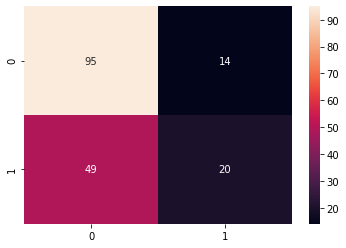

In [61]:
#Plot the heatmap:

sns.heatmap(cm2, annot=True)

In [62]:
#Classification Report:

print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       109
           1       0.59      0.29      0.39        69

    accuracy                           0.65       178
   macro avg       0.62      0.58      0.57       178
weighted avg       0.63      0.65      0.61       178



## Naive Bayesian Classification


In [63]:
#Import Gaussian Naive Bayes model

from sklearn.naive_bayes import GaussianNB

In [64]:
#Create a Gaussian Classifier

gnb = GaussianNB()

In [65]:
#Train the model using the training sets
gnb.fit(X_train, y_train)

GaussianNB()

In [66]:
#Predict the response for test dataset
y_pred_nb = gnb.predict(X_test)

In [67]:
y_pred_nb

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [68]:
#Concatenating the Predicted values and actual values in one dataframe.

nb_op = pd.DataFrame({'Actual value': y_test, 'Predicted value using Logistic Regression':y_pred, 'Predicted value using Naive Bayesian': y_pred_nb, 'Predicted value using SVM': predictions })
nb_op

,Actual value,Predicted value using Logistic Regression,Predicted value using Naive Bayesian,Predicted value using SVM
543,1,0,0,0
327,1,1,1,0
73,0,0,0,0
358,1,1,1,0
660,1,0,1,1
...,...,...,...,...
530,1,1,1,0
786,1,1,1,0
311,1,1,1,1
317,0,0,0,0


In [69]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy for Naive Bayesian Classifier:",metrics.accuracy_score(y_test, y_pred_nb))

Accuracy for Naive Bayesian Classifier: 0.7808988764044944


## Stochastic Gradient Descent Classifier

In [70]:
from sklearn.linear_model import SGDClassifier

In [71]:
sgd = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)

In [72]:
sgd.fit(X_train, y_train)

SGDClassifier(loss='modified_huber', random_state=101)

In [73]:
y_pred_sgd = sgd.predict(X_test)
y_pred_sgd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [74]:
#Concatenating the Predicted values and actual values in one dataframe.

sgd_op = pd.DataFrame({'Actual value': y_test, 'Logistic Regression':y_pred, 'Naive Bayesian': y_pred_nb, 'SVM': predictions, 'SGDClassifier':y_pred_sgd})
sgd_op

,Actual value,Logistic Regression,Naive Bayesian,SVM,SGDClassifier
543,1,0,0,0,0
327,1,1,1,0,0
73,0,0,0,0,0
358,1,1,1,0,0
660,1,0,1,1,0
...,...,...,...,...,...
530,1,1,1,0,0
786,1,1,1,0,0
311,1,1,1,1,1
317,0,0,0,0,0


In [75]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy for SGDClassifier:",metrics.accuracy_score(y_test, y_pred_sgd))

Accuracy for SGDClassifier: 0.6123595505617978


## K-Nearest Neighbours Algorithm

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=15)

In [78]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [79]:
y_pred_knn=knn.predict(X_test)

In [80]:
y_pred_knn

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [81]:
#Concatenating the Predicted values and actual values in one dataframe nb_op.

knn_op = pd.DataFrame({'Actual value': y_test, 'Logistic Regression':y_pred, 'Naive Bayesian': y_pred_nb, 'SVM': predictions, 'SGDClassifier':y_pred_sgd, 'KNN': y_pred_knn})
knn_op

,Actual value,Logistic Regression,Naive Bayesian,SVM,SGDClassifier,KNN
543,1,0,0,0,0,0
327,1,1,1,0,0,0
73,0,0,0,0,0,0
358,1,1,1,0,0,0
660,1,0,1,1,0,1
...,...,...,...,...,...,...
530,1,1,1,0,0,0
786,1,1,1,0,0,0
311,1,1,1,1,1,1
317,0,0,0,0,0,0


In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy for KNN:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy for KNN: 0.651685393258427


## Decision Tree Algorithm:

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features = None, min_samples_leaf = 15)

In [85]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=101)

In [86]:
y_pred_dtree = dtree.predict(X_test)

In [87]:
y_pred_dtree

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1])

In [88]:
#Concatenating the Predicted values and actual values in one dataframe.

dtree_op = pd.DataFrame({'Actual value': y_test, 'Logistic Regression':y_pred, 'Naive Bayesian': y_pred_nb, 'SVM': predictions, 'SGDClassifier':y_pred_sgd, 'KNN': y_pred_knn, 'Dtree':y_pred_dtree})
dtree_op

,Actual value,Logistic Regression,Naive Bayesian,SVM,SGDClassifier,KNN,Dtree
543,1,0,0,0,0,0,0
327,1,1,1,0,0,0,1
73,0,0,0,0,0,0,0
358,1,1,1,0,0,0,1
660,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...
530,1,1,1,0,0,0,1
786,1,1,1,0,0,0,1
311,1,1,1,1,1,1,1
317,0,0,0,0,0,0,0


In [89]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test, y_pred_dtree))

Accuracy for Decision Tree: 0.7584269662921348


## Random Forest Algorithm:

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfm = RandomForestClassifier(n_estimators = 70, oob_score=True, n_jobs=1, random_state=101, max_features= None, min_samples_leaf=30)

In [92]:
rfm.fit(X_train, y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=70,
                       n_jobs=1, oob_score=True, random_state=101)

In [93]:
y_pred_rfm = rfm.predict(X_test)

In [94]:
y_pred_rfm

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0])

In [95]:
#Concatenating the Predicted values and actual values in one dataframe.

rfm_op = pd.DataFrame({'Actual value': y_test, 'Logistic Regression':y_pred, 'Naive Bayesian': y_pred_nb, 
                       'SVM': predictions, 'SGDClassifier':y_pred_sgd, 'KNN': y_pred_knn, 
                       'Dtree':y_pred_dtree, 'Random Forest':y_pred_rfm})
rfm_op

,Actual value,Logistic Regression,Naive Bayesian,SVM,SGDClassifier,KNN,Dtree,Random Forest
543,1,0,0,0,0,0,0,0
327,1,1,1,0,0,0,1,1
73,0,0,0,0,0,0,0,0
358,1,1,1,0,0,0,1,1
660,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...
530,1,1,1,0,0,0,1,1
786,1,1,1,0,0,0,1,0
311,1,1,1,1,1,1,1,1
317,0,0,0,0,0,0,0,0


In [96]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy for Random Forest:",metrics.accuracy_score(y_test, y_pred_rfm))

Accuracy for Random Forest: 0.7752808988764045


## Accuracy Comparison of all Classification Models on Titanic Dataset

In [97]:
print("Accuracy Score of Logistic Regression: ",metrics.accuracy_score(y_test,y_pred))
print("Accuracy Score of SVM: ",metrics.accuracy_score(y_test,predictions))
print("Accuracy for Naive Bayesian Classifier:",metrics.accuracy_score(y_test, y_pred_nb))
print("Accuracy for SGDClassifier:",metrics.accuracy_score(y_test, y_pred_sgd))
print("Accuracy for KNN:",metrics.accuracy_score(y_test, y_pred_knn))
print("Accuracy for Decision Tree:",metrics.accuracy_score(y_test, y_pred_dtree))
print("Accuracy for Random Forest:",metrics.accuracy_score(y_test, y_pred_rfm))

Accuracy Score of Logistic Regression:  0.7528089887640449
Accuracy Score of SVM:  0.6348314606741573
Accuracy for Naive Bayesian Classifier: 0.7808988764044944
Accuracy for SGDClassifier: 0.6123595505617978
Accuracy for KNN: 0.651685393258427
Accuracy for Decision Tree: 0.7584269662921348
Accuracy for Random Forest: 0.7752808988764045


## Inference:

In this project, I have trained the titanic dataset on the above mentioned classification algorithms which include Logistic Regression, SVM, Naive Bayesian Classification, Stochastic Gradient Descent, K-Nearest Neighbor, Decision Tree, Random Forest. From the above accuracy results we can infer that after repeated iterations and observations, the decision tree algorithm, Random Forest, Naive Bayesian Classification and Logistic Regression always top the list and prove to be more accurate for Titanic Dataset. Also, SVM, SGD and KNN prove to be the least efficient algorithms for the dataset.